# Convert pose format


In [27]:
import sys
sys.path.append("..")
sys.path.append("/workspace/aseeo-research")
import torch
from svox2 import *
import RLResearch.utils.gen_utils as gu
import numpy as np
from pathlib import Path
import RLResearch.utils.ms_utils as mu
import RLResearch.utils.visualization as vi
import RLResearch.utils.pose_utils as pu

import Metashape
import matplotlib.pyplot as plt

In [33]:
def load_tnt_data(folder_name):
    folder_path = Path(folder_name) / "pose"
    poses = []
    for filename in folder_path.iterdir():
        # print(filename)
        flat_poses = np.loadtxt(filename)
        pose = flat_poses.reshape(4,4)
        # print(pose)
        poses.append(pose)
        
    poses = np.asarray(poses)
    print("Poses shape")
    print(poses.shape)
    return poses

def rescale_to_sphere(poses, scale_radius = 3):
    "Rescales to a sphere of radius <scale_radius>"

    positions = poses[:,:3,3]
    norms = np.linalg.norm(positions, axis = 1)
    max_cam_norm = max(norms)
    scale_factor = scale_radius / max_cam_norm / 1.1
    print(scale_factor)

    poses[:, :3, 3] = positions * scale_factor

    return poses

In [38]:
data_folder = "/workspace/datasets/TanksAndTempleBG/Truck"
tnt_poses = load_tnt_data(data_folder)

ms_filename = "/workspace/datasets/truck_ms/project_files/ms_poses.psz"
doc = Metashape.Document()
doc.open(ms_filename)
undistorted_chunk = mu.get_chunk_by_name(doc, "undistorted_poses")
ms_poses = mu.get_poses(undistorted_chunk)

Poses shape
(251, 4, 4)
LoadProject: path = /workspace/datasets/truck_ms/project_files/ms_poses.psz
loaded project in 0.233975 sec
Trying to get chunk  undistorted_poses
No transform in chunk, no rescaling was applied


3.0000000000000004
0.28787141219972223


TypeError: visualize_poses_points() got an unexpected keyword argument 'scale'

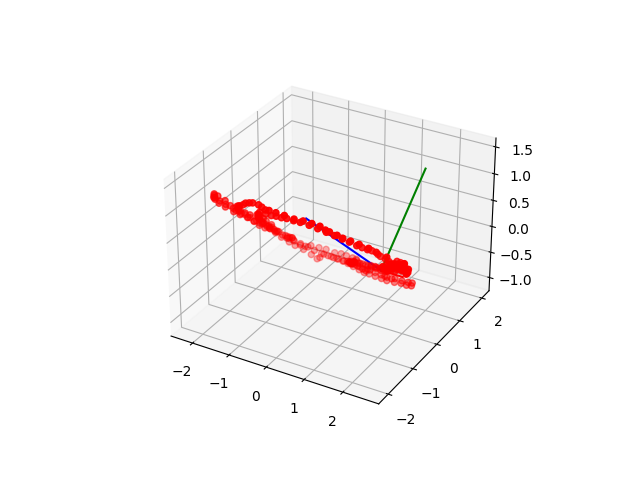

In [45]:
# Visualize

tnt_poses_rc = rescale_to_sphere(pu.recenter_poses(tnt_poses))
ms_poses_rc = rescale_to_sphere(pu.recenter_poses(ms_poses))



%matplotlib widget

fig = plt.figure()

vi.visualize_poses_points(tnt_poses_rc[:,...], fig = fig, col="r")
vi.visualize_poses_orientations(tnt_poses_rc[:1,...], fig = fig, scale=2)
# vi.visualize_poses_labels(tnt_poses_rc[:10,...], np.arange(0, tnt_poses_rc.shape[0], 5), fig = fig)

vi.visualize_poses_points(ms_poses_rc[:,...], fig = fig, col="b")
vi.visualize_poses_orientations(ms_poses_rc[:1,...], fig = fig, scale = 2)
# vi.visualize_poses_labels(ms_poses_rc[:10,...], np.arange(0, ms_poses_rc.shape[0], 5), fig = fig)


vi.draw_labels(fig)
vi.set_lims_centered(fig,[0, 0, 0], 3)
vi.draw_axis(fig.gca(), scale=2)